## Введение в искусственные нейронные сети
### Урок 2. Keras

### ЗАДАНИЕ

Возьмите набор примеров fashion-MNIST

1. Опишите - какой результат нейросети получен в зависимости от:
   
   a. числа нейронов в слое (для 2-х слойной сети),
   
   b. числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
   
   c. фиксируйте для тренировочного и тестового набора метрики accuracy.
   

2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [1]:
# Загрузка набора fashion-MNIST и необходимых библиотек

import keras

import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
import numpy as np
import pandas as pd

(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

### Анализ данных

Label is 2


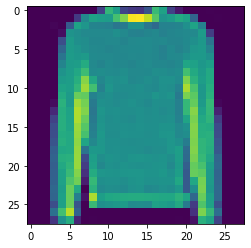

In [2]:
# Случайный пример
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind])
print(f'Label is {y_train_labels[ind]}')

In [3]:
# Форма набора 
print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


In [4]:
# Примеры меток набора 
y_train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### Подготовка данных 

In [5]:
# Оценка диапазона изменения значений 
X_train.min(), X_train.max()

(0, 255)

In [6]:
# Нормализация 
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [7]:
# Вытягивание признаков
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

### Построение модели

In [8]:
from keras.layers import Dense
from keras.models import Sequential


# define the keras model
model = Sequential()
model.add(Dense(64, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


### **Компиляция модели**

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

### Обучение модели 

In [10]:
y_train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [11]:
from keras.utils import to_categorical


y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
X_train.shape

(60000, 784)

In [13]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=1, validation_split=0.2)

Epoch 1/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.8621 - accuracy: 0.7107 - val_loss: 0.5043 - val_accuracy: 0.8260
Epoch 2/5
4800/4800 [==============================] - 8s 2ms/step - loss: 0.4864 - accuracy: 0.8324 - val_loss: 0.4440 - val_accuracy: 0.8449
Epoch 3/5
4800/4800 [==============================] - 8s 2ms/step - loss: 0.4395 - accuracy: 0.8459 - val_loss: 0.4135 - val_accuracy: 0.8561
Epoch 4/5
4800/4800 [==============================] - 8s 2ms/step - loss: 0.3989 - accuracy: 0.8599 - val_loss: 0.4036 - val_accuracy: 0.8579
Epoch 5/5
4800/4800 [==============================] - 8s 2ms/step - loss: 0.3875 - accuracy: 0.8629 - val_loss: 0.3824 - val_accuracy: 0.8662


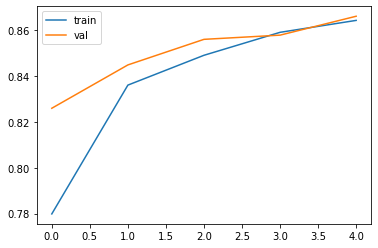

In [14]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend();

### ЗАДАЧА 1

1a. Опишите - какой результат нейросети получен в зависимости от числа нейронов в слое (для 2-х слойной сети)
   

Epoch 1/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.9240 - accuracy: 0.6757 - val_loss: 0.5352 - val_accuracy: 0.8121
Epoch 2/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.4766 - accuracy: 0.8293 - val_loss: 0.4576 - val_accuracy: 0.8412
Epoch 3/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.4330 - accuracy: 0.8463 - val_loss: 0.4191 - val_accuracy: 0.8560
Epoch 4/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.4023 - accuracy: 0.8560 - val_loss: 0.4128 - val_accuracy: 0.8547
Epoch 5/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3790 - accuracy: 0.8634 - val_loss: 0.3779 - val_accuracy: 0.8668


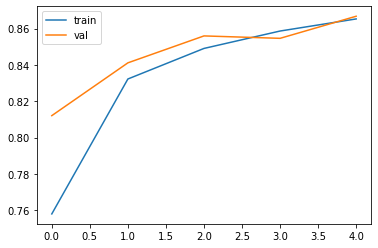

In [15]:
# Число нейронов в первом слоей 12

model = Sequential()
model.add(Dense(64, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=1, validation_split=0.2)

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend();

Epoch 1/5
4800/4800 [==============================] - 10s 2ms/step - loss: 0.8971 - accuracy: 0.6952 - val_loss: 0.4942 - val_accuracy: 0.8262
Epoch 2/5
4800/4800 [==============================] - 8s 2ms/step - loss: 0.4677 - accuracy: 0.8335 - val_loss: 0.4452 - val_accuracy: 0.8372
Epoch 3/5
4800/4800 [==============================] - 8s 2ms/step - loss: 0.4212 - accuracy: 0.8509 - val_loss: 0.3918 - val_accuracy: 0.8597
Epoch 4/5
4800/4800 [==============================] - 8s 2ms/step - loss: 0.3836 - accuracy: 0.8612 - val_loss: 0.3904 - val_accuracy: 0.8632
Epoch 5/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3613 - accuracy: 0.8701 - val_loss: 0.3731 - val_accuracy: 0.8661


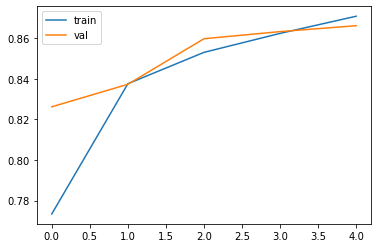

In [16]:
# Число нейронов в первом слоей 24

model = Sequential()
model.add(Dense(64, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=1, validation_split=0.2)

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend();

Epoch 1/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.9196 - accuracy: 0.6891 - val_loss: 0.4830 - val_accuracy: 0.8362
Epoch 2/5
4800/4800 [==============================] - 8s 2ms/step - loss: 0.4743 - accuracy: 0.8310 - val_loss: 0.4543 - val_accuracy: 0.8361
Epoch 3/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.4126 - accuracy: 0.8528 - val_loss: 0.4057 - val_accuracy: 0.8574
Epoch 4/5
4800/4800 [==============================] - 8s 2ms/step - loss: 0.3810 - accuracy: 0.8652 - val_loss: 0.3912 - val_accuracy: 0.8608
Epoch 5/5
4800/4800 [==============================] - 8s 2ms/step - loss: 0.3697 - accuracy: 0.8676 - val_loss: 0.3801 - val_accuracy: 0.8660


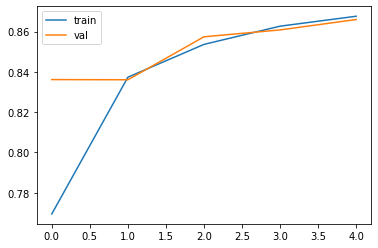

In [17]:
# Число нейронов в первом слоей 32

model = Sequential()
model.add(Dense(64, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=1, validation_split=0.2)

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend();

Epoch 1/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.8706 - accuracy: 0.7027 - val_loss: 0.5032 - val_accuracy: 0.8230
Epoch 2/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.4563 - accuracy: 0.8390 - val_loss: 0.4395 - val_accuracy: 0.8426
Epoch 3/5
4800/4800 [==============================] - 8s 2ms/step - loss: 0.4086 - accuracy: 0.8533 - val_loss: 0.4019 - val_accuracy: 0.8575
Epoch 4/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3834 - accuracy: 0.8625 - val_loss: 0.3750 - val_accuracy: 0.8659
Epoch 5/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3548 - accuracy: 0.8714 - val_loss: 0.3773 - val_accuracy: 0.8669


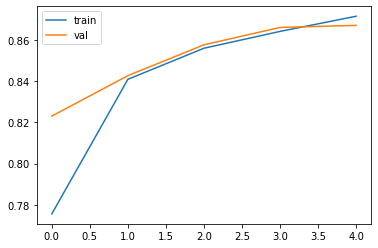

In [18]:
# Число нейронов в первом слоей 64

model = Sequential()
model.add(Dense(64, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=1, validation_split=0.2)

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend();

Epoch 1/5
4800/4800 [==============================] - 10s 2ms/step - loss: 0.8752 - accuracy: 0.7042 - val_loss: 0.5305 - val_accuracy: 0.8126
Epoch 2/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.4571 - accuracy: 0.8385 - val_loss: 0.4351 - val_accuracy: 0.8477
Epoch 3/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.4061 - accuracy: 0.8554 - val_loss: 0.4151 - val_accuracy: 0.8508
Epoch 4/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3823 - accuracy: 0.8634 - val_loss: 0.4045 - val_accuracy: 0.8586
Epoch 5/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3569 - accuracy: 0.8690 - val_loss: 0.3669 - val_accuracy: 0.8687


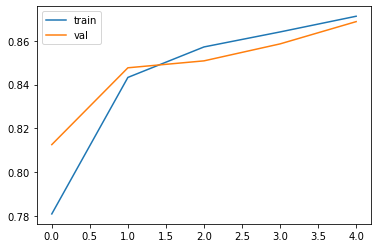

In [19]:
# Число нейронов в первом слоей 128

model = Sequential()
model.add(Dense(64, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=1, validation_split=0.2)

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend();

Epoch 1/5
4800/4800 [==============================] - 10s 2ms/step - loss: 0.9141 - accuracy: 0.6873 - val_loss: 0.4897 - val_accuracy: 0.8254
Epoch 2/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.4648 - accuracy: 0.8353 - val_loss: 0.4301 - val_accuracy: 0.8447
Epoch 3/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.4019 - accuracy: 0.8578 - val_loss: 0.4325 - val_accuracy: 0.8394
Epoch 4/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3848 - accuracy: 0.8603 - val_loss: 0.3895 - val_accuracy: 0.8615
Epoch 5/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3512 - accuracy: 0.8705 - val_loss: 0.3606 - val_accuracy: 0.8680


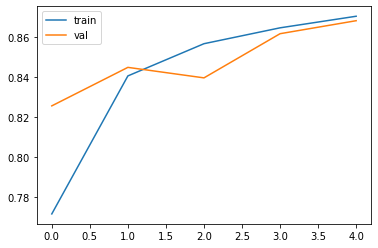

In [20]:
# Число нейронов в первом слоей 256

model = Sequential()
model.add(Dense(64, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=1, validation_split=0.2)

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend();

### Вывод

С увеличением числа нейронов во втором слое происходит постепенное увеличение точности на валидационном множестве и достигает наилучших результатов при 64 нейронах. При числе нейронов в 128 наблюдается снижение точности т.е. наступило переобучение модели. 

1b. Опишите - какой результат нейросети получен в зависимости от числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).

Epoch 1/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.8973 - accuracy: 0.6950 - val_loss: 0.5069 - val_accuracy: 0.8145
Epoch 2/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.4592 - accuracy: 0.8366 - val_loss: 0.4258 - val_accuracy: 0.8455
Epoch 3/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.4102 - accuracy: 0.8541 - val_loss: 0.3998 - val_accuracy: 0.8605
Epoch 4/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3697 - accuracy: 0.8666 - val_loss: 0.4193 - val_accuracy: 0.8475
Epoch 5/5
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3638 - accuracy: 0.8684 - val_loss: 0.3622 - val_accuracy: 0.8705


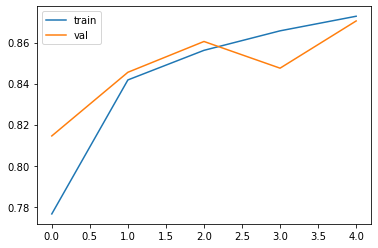

In [21]:
# Число слоев 2

model = Sequential()
model.add(Dense(64, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=1, validation_split=0.2)

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend();

Epoch 1/5
4800/4800 [==============================] - 11s 2ms/step - loss: 0.9001 - accuracy: 0.6900 - val_loss: 0.4706 - val_accuracy: 0.8359
Epoch 2/5
4800/4800 [==============================] - 10s 2ms/step - loss: 0.4593 - accuracy: 0.8368 - val_loss: 0.4421 - val_accuracy: 0.8382
Epoch 3/5
4800/4800 [==============================] - 10s 2ms/step - loss: 0.4021 - accuracy: 0.8544 - val_loss: 0.4147 - val_accuracy: 0.8468
Epoch 4/5
4800/4800 [==============================] - 10s 2ms/step - loss: 0.3716 - accuracy: 0.8651 - val_loss: 0.4021 - val_accuracy: 0.8569
Epoch 5/5
4800/4800 [==============================] - 10s 2ms/step - loss: 0.3526 - accuracy: 0.8716 - val_loss: 0.3552 - val_accuracy: 0.8702


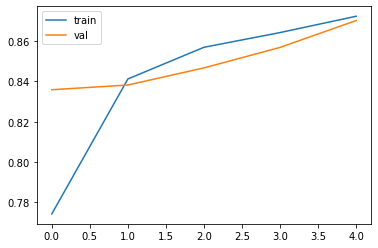

In [22]:
# Число слоев 3

model = Sequential()
model.add(Dense(64, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=1, validation_split=0.2)

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend();

Epoch 1/5
4800/4800 [==============================] - 12s 3ms/step - loss: 1.0054 - accuracy: 0.6444 - val_loss: 0.5145 - val_accuracy: 0.8173
Epoch 2/5
4800/4800 [==============================] - 12s 2ms/step - loss: 0.4502 - accuracy: 0.8376 - val_loss: 0.4416 - val_accuracy: 0.8407
Epoch 3/5
4800/4800 [==============================] - 12s 2ms/step - loss: 0.3925 - accuracy: 0.8572 - val_loss: 0.3924 - val_accuracy: 0.8612
Epoch 4/5
4800/4800 [==============================] - 12s 2ms/step - loss: 0.3684 - accuracy: 0.8645 - val_loss: 0.3862 - val_accuracy: 0.8590
Epoch 5/5
4800/4800 [==============================] - 12s 2ms/step - loss: 0.3407 - accuracy: 0.8722 - val_loss: 0.4007 - val_accuracy: 0.8468


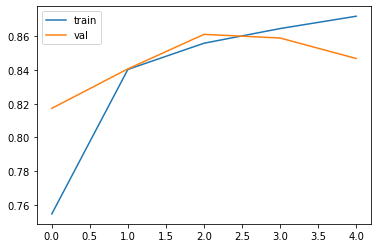

In [23]:
# Число слоев 5

model = Sequential()
model.add(Dense(64, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=1, validation_split=0.2)

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend();

Epoch 1/5
4800/4800 [==============================] - 16s 3ms/step - loss: 1.3333 - accuracy: 0.5098 - val_loss: 0.5149 - val_accuracy: 0.8179
Epoch 2/5
4800/4800 [==============================] - 15s 3ms/step - loss: 0.5029 - accuracy: 0.8156 - val_loss: 0.4704 - val_accuracy: 0.8254
Epoch 3/5
4800/4800 [==============================] - 15s 3ms/step - loss: 0.4297 - accuracy: 0.8465 - val_loss: 0.4069 - val_accuracy: 0.8537
Epoch 4/5
4800/4800 [==============================] - 15s 3ms/step - loss: 0.3833 - accuracy: 0.8604 - val_loss: 0.4022 - val_accuracy: 0.8584
Epoch 5/5
4800/4800 [==============================] - 16s 3ms/step - loss: 0.3634 - accuracy: 0.8658 - val_loss: 0.4007 - val_accuracy: 0.8548


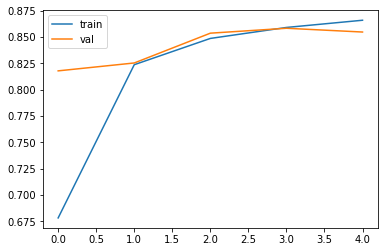

In [24]:
# Число слоев 10

model = Sequential()
model.add(Dense(64, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(128, activation='relu')) #1
model.add(Dense(128, activation='relu')) #2
model.add(Dense(128, activation='relu')) #3
model.add(Dense(128, activation='relu')) #4
model.add(Dense(128, activation='relu')) #5
model.add(Dense(128, activation='relu')) #6
model.add(Dense(128, activation='relu')) #7
model.add(Dense(128, activation='relu')) #8
model.add(Dense(128, activation='relu')) #9
model.add(Dense(10, activation='sigmoid')) #10

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=1, validation_split=0.2)

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend();

### Вывод

  При увеличении слоев, оптимальное соотношение скорость обучения / качество модели / точность достигается при числе слоев равным 3. 

При числе слоев равным 10 точность на валидационном и тренировочном множестве практически совпадают, что указывает на переобучение модели. 

1c. Опишите - какой результат нейросети получен в зависимости от фиксирования для тренировочного и тестового набора метрики accuracy.

Epoch 1/5
4800/4800 [==============================] - 10s 2ms/step - loss: 0.8993 - accuracy: 0.6832 - val_loss: 0.5097 - val_accuracy: 0.8170

Epoch 00001: saving model to model_best_1_0.51
INFO:tensorflow:Assets written to: model_best_1_0.51/assets
Epoch 2/5
4800/4800 [==============================] - 10s 2ms/step - loss: 0.4488 - accuracy: 0.8406 - val_loss: 0.4103 - val_accuracy: 0.8517

Epoch 00002: saving model to model_best_2_0.41
INFO:tensorflow:Assets written to: model_best_2_0.41/assets
Epoch 3/5
4800/4800 [==============================] - 10s 2ms/step - loss: 0.3923 - accuracy: 0.8576 - val_loss: 0.4145 - val_accuracy: 0.8515

Epoch 00003: saving model to model_best_3_0.41
INFO:tensorflow:Assets written to: model_best_3_0.41/assets
Epoch 4/5
4800/4800 [==============================] - 10s 2ms/step - loss: 0.3685 - accuracy: 0.8657 - val_loss: 0.3629 - val_accuracy: 0.8698

Epoch 00004: saving model to model_best_4_0.36
INFO:tensorflow:Assets written to: model_best_4_0.36

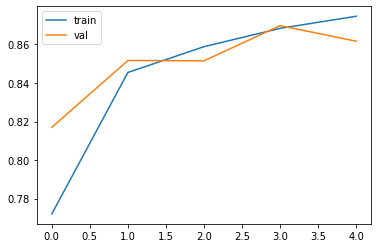

In [25]:
# Число слоев 3 + фиксация метрики accuracy.

model = Sequential()
model.add(Dense(64, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))


from keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint(filepath='model_best_{epoch}_{val_loss:.2f}',
                                   monitor='accuracy',
                                   verbose=1,
                                   save_best_only=False,
                                   save_weights_only=False,
                                   mode='auto',
                                   period=1) 


model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10, 
                    verbose=1, 
                    validation_split=0.2,
                    callbacks=[model_checkpoint])

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend();

### Вывод

Выполнено обучение модели с 3 слоями и фиксацией метрики accuracy  для тренировочного и тестового набора 


### ЗАДАЧА 2

Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

In [26]:
# SGD (+ momentum)
from keras.optimizers import SGD
SGD(learning_rate=0.01, momentum=0.5)

# AdaGrad
from keras.optimizers import Adagrad
Adagrad(learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07)

# RMSProp (Leaky AdaGrad)
from keras.optimizers import RMSprop
RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-07)

# Adam
from keras.optimizers import Adam
Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8109 - accuracy: 0.7203 - val_loss: 0.5885 - val_accuracy: 0.7872

Epoch 00001: saving model to model_best_1_0.59
INFO:tensorflow:Assets written to: model_best_1_0.59/assets
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4996 - accuracy: 0.8247 - val_loss: 0.4866 - val_accuracy: 0.8274

Epoch 00002: saving model to model_best_2_0.49
INFO:tensorflow:Assets written to: model_best_2_0.49/assets
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4470 - accuracy: 0.8424 - val_loss: 0.4611 - val_accuracy: 0.8376

Epoch 00003: saving model to model_best_3_0.46
INFO:tensorflow:Assets written to: model_best_3_0.46/assets
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4169 - accuracy: 0.8520 - val_loss: 0.4682 - val_accuracy: 0.8376

Epoch 00004: saving model to model_best_4_0.47
INFO:tensorflow:Assets written to: model_best_4_0.47/ass

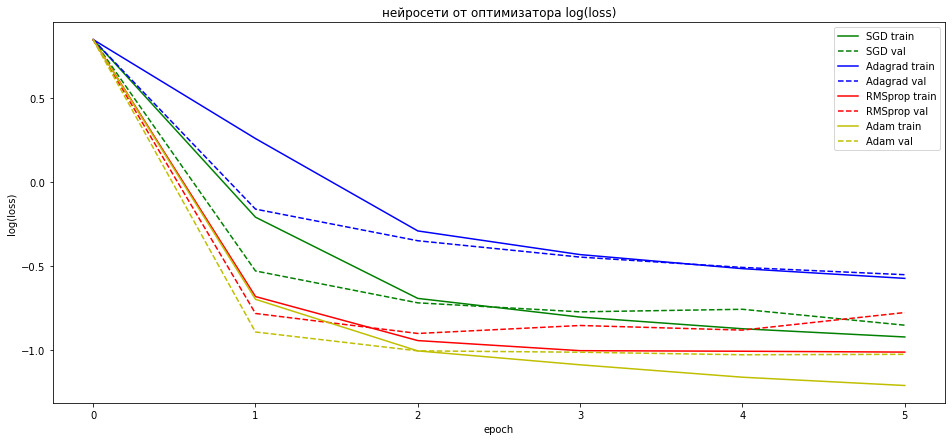

In [27]:

# создаем модель model
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='sigmoid'),
])

# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model_weights.h5')

# будем сохранять модели в словарь
models = {}


plt.figure(figsize=(16, 7))
colors = ['g', 'b', 'r', 'y']

num_epochs = 5
batch_size = 32

# вектор для вывода результатов
epoch = np.arange(num_epochs+1)

# будем изменять оптимизаторы
for i, i_optim in enumerate([keras.optimizers.SGD(),
                             keras.optimizers.Adagrad(),
                             keras.optimizers.RMSprop(),
                             keras.optimizers.Adam()]):
    
    # создаем рабочую модель  model_i, куда будем загружать эти веса (она должна быть идентичной структуры)
    model_i = Sequential([
        Dense(64, activation='relu', input_shape=(784,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10, activation='sigmoid'),
    ])
    
    # загружаем веса model_i.load_weights('model.h5')
    model_i.load_weights('model_weights.h5')
    
    # компилируем model_i с одним из оптимизаторов
    model_i.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )
    
    # вычисляем ошибку для modeli без обучения
    h0_train = model_i.evaluate(X_train, y_train, verbose=0)
    h0_val = model_i.evaluate(X_test, y_test, verbose=0)

    # Фиксируем accuracy.
    model_checkpoint = ModelCheckpoint(filepath='model_best_{epoch}_{val_loss:.2f}',
                                   monitor='accuracy',
                                   verbose=1,
                                   save_best_only=False,
                                   save_weights_only=False,
                                   mode='auto',
                                   period=1) 
    
    # проводим обучение модели 
    h = model_i.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[model_checkpoint])
    
    # записываем обученную модель в словарь
    models[i_optim.get_config()['name']] = model_i

    # картинки
    plt.plot(epoch, np.log([h0_train[0]] + h.history['loss']),
             '-', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' train')
    plt.plot(epoch, np.log([h0_val[0]] + h.history['val_loss']),
             '--', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' val')

plt.legend()
plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

### Задача 3

Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

Наилучший результат с точки зрения использования оптимизатора получился при использовании Adam. 

С точки зрения улучшения всей модели, то оптимальный результат достигается при одновременном использовании оптимального числа нейронов 128, оптимально числа слоев 3 и оптимизатора Adam.  

### Задача 4
Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [28]:
from sklearn.metrics import confusion_matrix
import itertools

In [29]:
y_pred = model_i.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


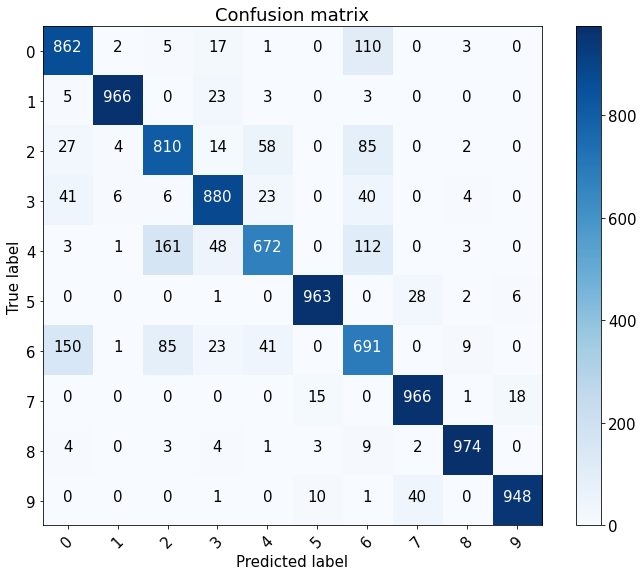

In [31]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test_labels, y_pred_class)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
                      title='Confusion matrix', normalize=False)
plt.show()

In [32]:
def get_precision_and_recall_from_confusion_matrix(label, cnf_matrix):
    str_sum = 0
    col_sum = 0
    for i in range(len(cnf_matrix)):
        str_sum += cnf_matrix[label][i]
        col_sum += cnf_matrix[i][label]
        
    return cnf_matrix[label][label] / str_sum, cnf_matrix[label][label] / col_sum

In [33]:
pr_rc_result = pd.DataFrame()
precisions = []
recalls = []
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for l in labels:
    p_r = get_precision_and_recall_from_confusion_matrix(l, cnf_matrix)
    precisions.append(p_r[0])
    recalls.append(p_r[1])
pr_rc_result['label'] = labels
pr_rc_result['precision'] = precisions
pr_rc_result['recall'] = recalls

In [34]:
pr_rc_result.sort_values(by='precision', ascending=False)

,label,precision,recall
8,8,0.974,0.975952
1,1,0.966,0.985714
7,7,0.966,0.932432
5,5,0.963,0.971746
9,9,0.948,0.975309
3,3,0.880,0.870425
0,0,0.862,0.789377
2,2,0.810,0.757009
6,6,0.691,0.657469
4,4,0.672,0.841051


In [35]:
pr_rc_result.sort_values(by='recall', ascending=False)

,label,precision,recall
1,1,0.966,0.985714
8,8,0.974,0.975952
9,9,0.948,0.975309
5,5,0.963,0.971746
7,7,0.966,0.932432
3,3,0.880,0.870425
4,4,0.672,0.841051
0,0,0.862,0.789377
2,2,0.810,0.757009
6,6,0.691,0.657469
